<a href="https://colab.research.google.com/github/rutujabhosale24/Regression_California_Housing_Dataset/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The California Housing Dataset is a classic dataset from the 1990s based on information collected in the 1990 U.S. Census. It contains housing information for California block groups, which are small geographic units used by the census.

**Objective** : To predict the median house value based on various features of the area.

Loading Libraries

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

Features Descriptions:

- MedInc(Median Income): Median income of households in a block (measured in tens of thousands of dollars). For example, 3.5 means $35,000.
- HouseAge (Housing Median Age) :	Median age of the houses in the block group (in years).
- AveRooms (Average Rooms) : Average number of rooms per household. Calculated as: total rooms / total households.
- AveBedrms (Average Bedrooms)	Average number of bedrooms per household. Calculated as: total bedrooms / total households.
- Population: Total population of the block group.
- AveOccup (Average Occupancy)	Average number of people per household. Calculated as: population / households.
- Latitude: Geographical latitude of the block group.
- Longitude: Geographical longitude of the block group.
- MedHouseValue : Median house value for households in the block group (measured in hundreds of thousands of dollars). or example, 2.5 means dollor 250,000.

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape

(20640, 9)

In [ ]:
# Dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Check for missing values
print(df.isnull().sum())

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


In [ ]:
# Checking Duplicate values
print(df.duplicated().sum())

0


# Data Visualization

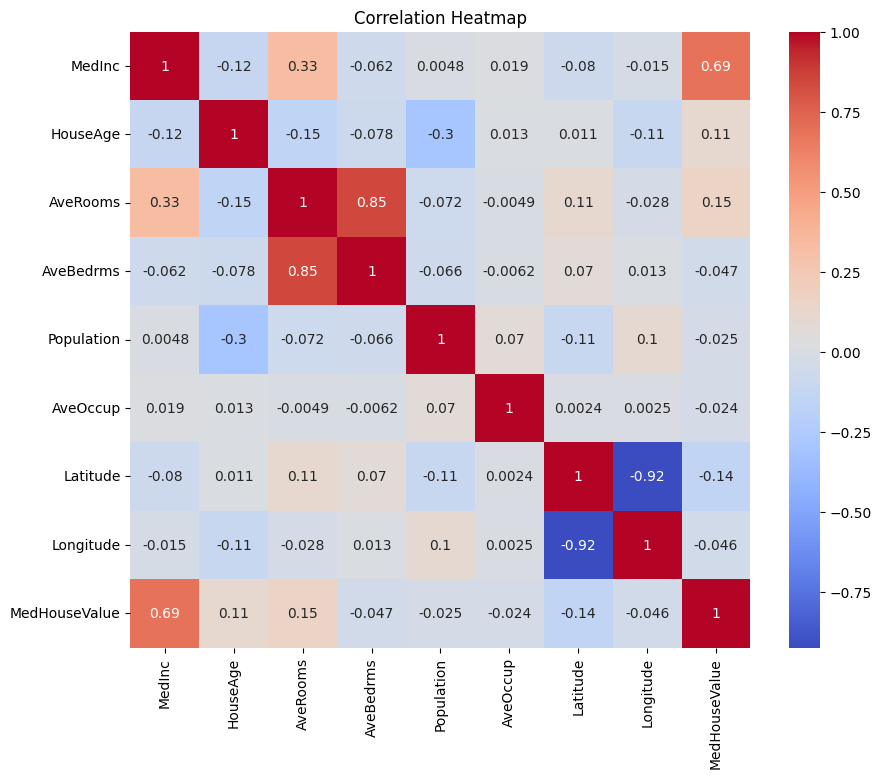

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Conclusion**

- The feature MedInc (median income) has the strongest positive correlation (0.69) with MedHouseValue, making it the most important predictor.
- Features like AveRooms and HouseAge show weak positive correlations, while Latitude shows a slight negative correlation.

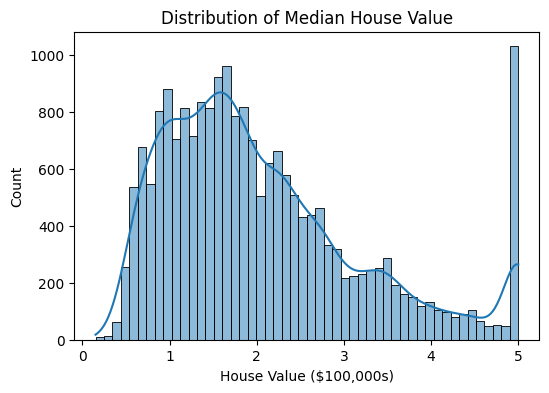

In [ ]:
#Histogram of Median House Value
plt.figure(figsize=(6, 4))
sns.histplot(df['MedHouseValue'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($100,000s)")
plt.show()

**Conclusion**

- The distribution is right-skewed, with most houses priced between dollor 100,000 and dollor 250,000.
- There's a sharp peak at $500,000, indicating that house values were capped (likely due to a limit in the dataset).

# Split the data

In [ ]:
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# Model Training

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score

# List of models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("XG Boosting", XGBRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
]
results={}

# Train-test split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training and evaluating each model
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)

    Accuracy=r2_score(y_test,y_test_pred)*100
    MSE=mean_squared_error(y_test,y_test_pred)
    RMSE=float(np.sqrt(MSE))

    print(f"{name}:")
    print("Accuracy:",Accuracy)
    print("RMSE:",RMSE)
    print("_____________________________________________________")
    results[name] = {'Accuracy':Accuracy,'RMSE':RMSE}

Linear Regression:
Accuracy: 57.5787706032451
RMSE: 0.7455813830127763
_____________________________________________________
Ridge Regression:
Accuracy: 57.58157428913684
RMSE: 0.7455567442814779
_____________________________________________________
Lasso Regression:
Accuracy: -0.021908714592466794
RMSE: 1.1448563543099792
_____________________________________________________
Decision Tree:
Accuracy: 61.970938616607285
RMSE: 0.705929341158675
_____________________________________________________
Random Forest:
Accuracy: 80.54594276782929
RMSE: 0.5049036666558167
_____________________________________________________
AdaBoost:
Accuracy: 50.21621441257448
RMSE: 0.8076949894891159
_____________________________________________________
Gradient Boosting:
Accuracy: 77.56433164710084
RMSE: 0.5422167577867202
_____________________________________________________
XG Boosting:
Accuracy: 83.01370561019205
RMSE: 0.4717943691423984
_____________________________________________________
K-Nearest Neig

Conclusion:

Based on the comparative analysis of various machine learning models, the XGBoost algorithm demonstrated superior performance in terms of accuracy and robustness, making it the most suitable choice for predicting House prices in this context.

In [ ]:
results

{'Linear Regression': {'Accuracy': 57.5787706032451,
  'RMSE': 0.7455813830127763},
 'Ridge Regression': {'Accuracy': 57.58157428913684,
  'RMSE': 0.7455567442814779},
 'Lasso Regression': {'Accuracy': -0.021908714592466794,
  'RMSE': 1.1448563543099792},
 'Decision Tree': {'Accuracy': 61.970938616607285, 'RMSE': 0.705929341158675},
 'Random Forest': {'Accuracy': 80.54594276782929, 'RMSE': 0.5049036666558167},
 'AdaBoost': {'Accuracy': 50.21621441257448, 'RMSE': 0.8076949894891159},
 'Gradient Boosting': {'Accuracy': 77.56433164710084,
  'RMSE': 0.5422167577867202},
 'XG Boosting': {'Accuracy': 83.01370561019205, 'RMSE': 0.4717943691423984},
 'K-Nearest Neighbors': {'Accuracy': 67.00101862970989,
  'RMSE': 0.6575877238850522},
 'Support Vector Machine': {'Accuracy': 72.75628923016772,
  'RMSE': 0.5974981438748282}}

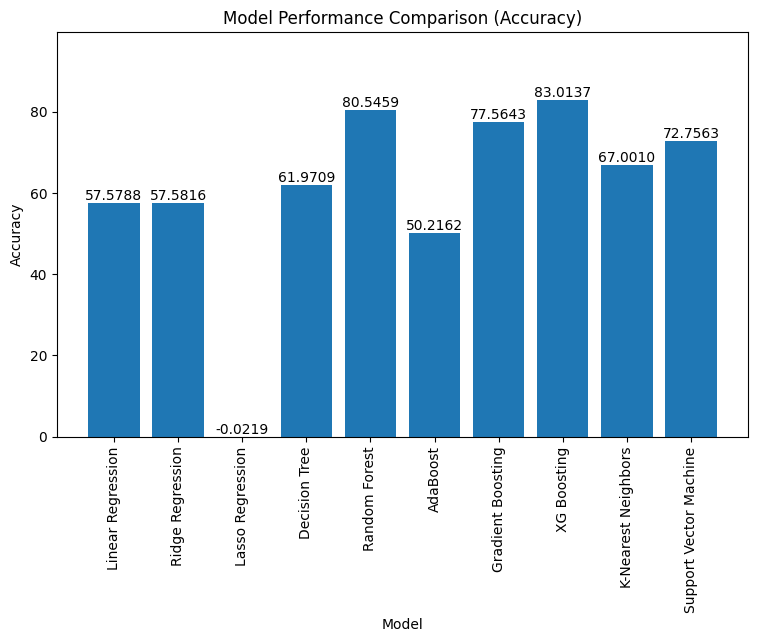

In [ ]:
# Create a bar chart with matplotlib to compare Accuracy
plt.figure(figsize=(8, 5))
models_names = list(results.keys())
acc_values = [results[model]['Accuracy'] for model in results]
plt.bar(models_names, acc_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.ylim(0, max(acc_values) * 1.2)  # Add some space above the highest bar
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

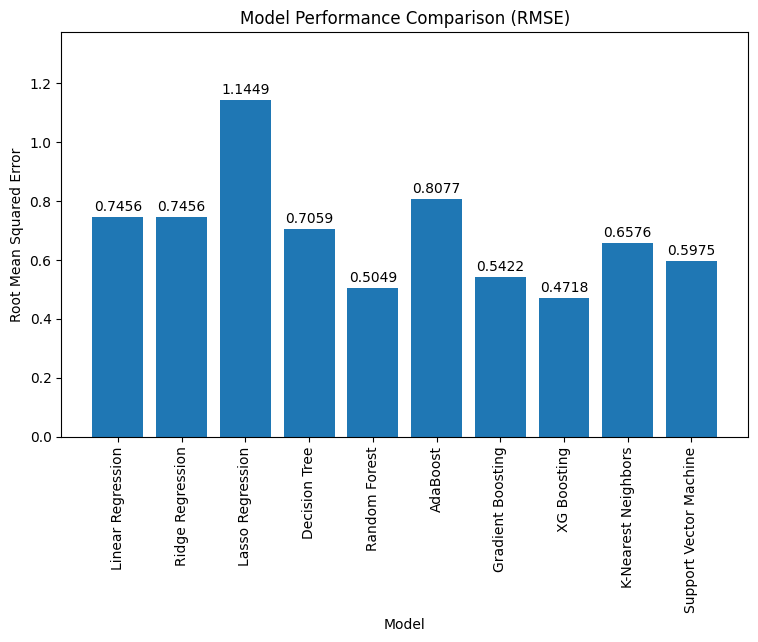

In [ ]:
# Create a bar chart with matplotlib to compare Error
plt.figure(figsize=(8, 5))
models_names = list(results.keys())
mse_values = [results[model]['RMSE'] for model in results]
plt.bar(models_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Model Performance Comparison (RMSE)')
plt.ylim(0, max(mse_values) * 1.2)  # Add some space above the highest bar
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

# Model Training & Evaluation for XGBoost Model

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_test_pred=xgb.predict(x_test)

Test_Accuracy=r2_score(y_test,y_test_pred)
MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=np.sqrt(MSE)

print(f"Test Accuracy of XG Boosting is:{round(Test_Accuracy*100,2)}%")
print("Mean Absolute Error:",MAE)
print("Root Mean Square Error:",RMSE)

Test Accuracy of XG Boosting is:83.01%
Mean Absolute Error: 0.30957335413783094
Root Mean Square Error: 0.4717943691423984


# XGBoost gives the Highest Accuracy - 83.01%


# Making a Predictive System

Sample Values For Testing

MedInc - 8.3252
HouseAge - 41.0
AveRooms - 6.984127
AveBedrms - -1.023810
Population - 322.0
AveOccup - 2.555556
Latitude - 37.88
Longitude - -122.23

In [ ]:
import numpy as np

def prediction():
    print("Enter the following details for prediction:")

    MedInc = float(input("Median Income: "))
    HouseAge = float(input("House Age: "))
    AveRooms = float(input("Average Rooms: "))
    AveBedrms = float(input("Average Bedrooms: "))
    Population = float(input("Population: "))
    AveOccup = float(input("Average Occupancy: "))
    Latitude = float(input("Latitude: "))
    Longitude = float(input("Longitude: "))

    # Combine inputs into an array
    input_data = [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
    input_array = np.asarray(input_data).reshape(1, -1)

    # Predict using the trained model
    predicted_value = xgb.predict(input_array)

    print(f"Estimated House Value: ${predicted_value[0] * 100000:.2f}")

# Call the function
prediction()

Enter the following details for prediction:
Median Income: 8.3252
House Age: 41.0
Average Rooms: 6.98
Average Bedrooms: 1.023
Population: 322
Average Occupancy: 2.55
Latitude: 37.88
Longitude: -122.23
Estimated House Value: $393698.94
